In [ ]:
#pytorch로 Logistic Regression 구현

#학습 데이터 생성
import torch

x_train = torch.FloatTensor([[1],[2],[3],[4],[5],[2.5],[3.5],[0],[3.1],[2.7],[2.8],[2.9]])
y_train = torch.FloatTensor([[1],[1],[1],[0],[0],[0],[0],[1],[0],[1],[1],[1]])

#W,b 초기화 
#learning rate 설정

W = torch.zeros(1,1)
b = torch.zeros(1,1)

lr = 1.0

#반복횟수 설정, W b의 requires_grad = True
for epoch in range(3001):
  W.requires_grad_(True)
  b.requires_grad_(True)
  


  #Hypothesis, cost 설정
  h = torch.sigmoid(torch.mm(x_train, W) + b)
  cost = torch.mean(
    -y_train * torch.log(h)
    -(1 - y_train) * torch.log(1-h)
  )
  #경사 계산 , W, b 업데이트
  cost.backward()
  with torch.no_grad() as grd:
    W = W - lr * W.grad
    b = b - lr * b.grad
    #학습 확인용 내용 출력
    #ppt와 동일함을 위해 100 -> 300, b -> b.squeeze()로 수정
    if epoch % 300 == 0:
      print( 'epoch: {}, cost: {:.6f}, W: {:.6f}, b: {:.6f}'.format(epoch, cost.item(), W.squeeze(), b.squeeze()))
  
  
  



epoch: 0, cost: 0.693147, W: -0.154167, b: 0.083333
epoch: 300, cost: 0.390820, W: -2.174322, b: 6.609553
epoch: 600, cost: 0.383699, W: -2.620779, b: 7.953164
epoch: 900, cost: 0.382149, W: -2.832521, b: 8.587363
epoch: 1200, cost: 0.381706, W: -2.946401, b: 8.927779
epoch: 1500, cost: 0.381565, W: -3.010968, b: 9.120598
epoch: 1800, cost: 0.381517, W: -3.048561, b: 9.232802
epoch: 2100, cost: 0.381500, W: -3.070765, b: 9.299053
epoch: 2400, cost: 0.381494, W: -3.083991, b: 9.338510
epoch: 2700, cost: 0.381492, W: -3.091908, b: 9.362126
epoch: 3000, cost: 0.381491, W: -3.096662, b: 9.376306


In [ ]:
#x = [4.5] 혹은 [1.1] y는 0인지 1인지
x_test = torch.FloatTensor([[4.5],[1.1]])
test_result = torch.sigmoid(torch.mm(x_test, W) + b)
print(torch.round(test_result))

tensor([[0.],
        [1.]])


In [ ]:
#여러가지 optimizer 사용해보기

optimizer = torch.optim.Adam([W,b], lr=1.0)
print(optimizer)
optimizer = torch.optim.Adadelta([W,b])
print(optimizer)
optimizer = torch.optim.Adagrad([W,b])
print(optimizer)
optimizer = torch.optim.RMSprop([W,b])
print(optimizer)


Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 1.0
    weight_decay: 0
)
Adadelta (
Parameter Group 0
    eps: 1e-06
    lr: 1.0
    rho: 0.9
    weight_decay: 0
)
Adagrad (
Parameter Group 0
    eps: 1e-10
    initial_accumulator_value: 0
    lr: 0.01
    lr_decay: 0
    weight_decay: 0
)
RMSprop (
Parameter Group 0
    alpha: 0.99
    centered: False
    eps: 1e-08
    lr: 0.01
    momentum: 0
    weight_decay: 0
)


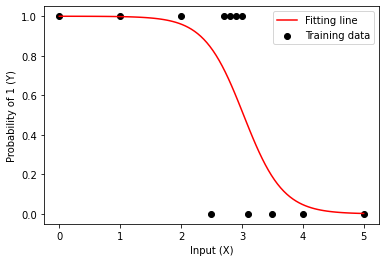

In [ ]:
#Matplotlib으로 결과 시각화
import matplotlib.pyplot as plt
W.requires_grad_(False)
b.requires_grad_(False)

plt.scatter(x_train,y_train, c="black", label="Training data")

X = torch.linspace(0,5,100).unsqueeze(1)
Y = torch.sigmoid(torch.mm(X,W)+b)
#label달기
plt.ylabel("Probability of 1 (Y)")
plt.xlabel("Input (X)")
plt.plot(X,Y, c="#ff0000", label="Fitting line")
#범례 표시
plt.legend()
plt.show()




In [ ]:
#sklearn에서  Logistic Regression 사용
from sklearn.linear_model import LogisticRegression
x_train = [[1],[2],[3],[4],[5],[2.5],[3.5],[0],[3.1],[2.7],[2.8],[2.9]]
y_train = [1,1,1,0,0,0,0,1,0,1,1,1] #pytorch랑 다름

model = LogisticRegression(penalty='none')# 비용함수 지정
model.fit(x_train, y_train)

#W와 b에 해당하는 값 출력
#model.coef -> 계수 model.intercept_ -> 절편
print(model.coef_, model.intercept_)

#새로운 x값이 주어질 때 y값 예측해보기
x_test = [[4.5],[1.1]]
test_result = model.predict(x_test)
print(test_result)

[[-3.10385806]] [9.39776831]
[0 1]
